In [1]:
# -----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math
import sys
import os
sys.path.append('../') #pongo los 2 puntos para que salga de la carpeta
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('..\\datos_3\\df_encoded.csv', index_col=0)
df.head()

,price,size,municipality,distance,status,floor,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_False,exterior_True,rooms_0,rooms_1,rooms_2,rooms_3,rooms_4,bathrooms_1,bathrooms_2,bathrooms_3
0,750.0,60.0,705.594114,7037,695.243827,697.689843,702.252872,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,750.0,70.0,701.418584,16145,695.243827,678.664014,687.633544,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,400.0,67.0,654.819074,55041,695.243827,696.092223,687.633544,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,590.0,70.0,679.539684,56596,695.243827,670.416613,687.633544,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,684.0,45.0,705.594114,10656,682.123310,670.416613,673.705516,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
df.describe()

,price,size,municipality,distance,status,floor,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_False,exterior_True,rooms_0,rooms_1,rooms_2,rooms_3,rooms_4,bathrooms_1,bathrooms_2,bathrooms_3
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,692.932011,59.728045,698.544831,16698.824363,694.379546,691.368462,694.129461,0.008499,0.002833,0.039660,0.784703,0.028329,0.135977,0.192635,0.807365,0.138810,0.342776,0.362606,0.147309,0.008499,0.892351,0.104816,0.002833
std,61.307820,23.799745,9.256803,13549.504221,2.984746,13.165165,8.558689,0.091925,0.053225,0.195436,0.411612,0.166145,0.343251,0.394928,0.394928,0.346239,0.475311,0.481435,0.354917,0.091925,0.310376,0.306751,0.053225
min,400.000000,20.000000,654.819074,183.000000,682.123310,670.416613,673.705516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,650.000000,45.000000,695.353124,5656.000000,695.243827,678.664014,687.633544,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,700.000000,57.000000,701.027166,12321.000000,695.243827,696.092223,687.633544,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,740.000000,70.000000,705.594114,26558.000000,695.243827,701.698078,702.252872,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,750.000000,206.000000,705.594114,56596.000000,695.243827,710.750072,702.252872,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
lista_columnas = df.columns

In [5]:
lista_columnas.tolist
lista_columnas = lista_columnas[1:]

In [6]:
columnas_minmax = [col + "_minmax" for col in lista_columnas]

In [7]:
columnas_minmax

['size_minmax',
 'municipality_minmax',
 'distance_minmax',
 'status_minmax',
 'floor_minmax',
 'hasLift_minmax',
 'propertyType_chalet_minmax',
 'propertyType_countryHouse_minmax',
 'propertyType_duplex_minmax',
 'propertyType_flat_minmax',
 'propertyType_penthouse_minmax',
 'propertyType_studio_minmax',
 'exterior_False_minmax',
 'exterior_True_minmax',
 'rooms_0_minmax',
 'rooms_1_minmax',
 'rooms_2_minmax',
 'rooms_3_minmax',
 'rooms_4_minmax',
 'bathrooms_1_minmax',
 'bathrooms_2_minmax',
 'bathrooms_3_minmax']

In [8]:
columnas_robust = [col + "_robust" for col in lista_columnas]

In [9]:
columnas_robust

['size_robust',
 'municipality_robust',
 'distance_robust',
 'status_robust',
 'floor_robust',
 'hasLift_robust',
 'propertyType_chalet_robust',
 'propertyType_countryHouse_robust',
 'propertyType_duplex_robust',
 'propertyType_flat_robust',
 'propertyType_penthouse_robust',
 'propertyType_studio_robust',
 'exterior_False_robust',
 'exterior_True_robust',
 'rooms_0_robust',
 'rooms_1_robust',
 'rooms_2_robust',
 'rooms_3_robust',
 'rooms_4_robust',
 'bathrooms_1_robust',
 'bathrooms_2_robust',
 'bathrooms_3_robust']

In [10]:
columnas_norm = [col + "_norm" for col in lista_columnas]

In [11]:
columnas_norm

['size_norm',
 'municipality_norm',
 'distance_norm',
 'status_norm',
 'floor_norm',
 'hasLift_norm',
 'propertyType_chalet_norm',
 'propertyType_countryHouse_norm',
 'propertyType_duplex_norm',
 'propertyType_flat_norm',
 'propertyType_penthouse_norm',
 'propertyType_studio_norm',
 'exterior_False_norm',
 'exterior_True_norm',
 'rooms_0_norm',
 'rooms_1_norm',
 'rooms_2_norm',
 'rooms_3_norm',
 'rooms_4_norm',
 'bathrooms_1_norm',
 'bathrooms_2_norm',
 'bathrooms_3_norm']

In [12]:
columnas_stand = [col + "_stand" for col in lista_columnas]

In [13]:
columnas_stand

['size_stand',
 'municipality_stand',
 'distance_stand',
 'status_stand',
 'floor_stand',
 'hasLift_stand',
 'propertyType_chalet_stand',
 'propertyType_countryHouse_stand',
 'propertyType_duplex_stand',
 'propertyType_flat_stand',
 'propertyType_penthouse_stand',
 'propertyType_studio_stand',
 'exterior_False_stand',
 'exterior_True_stand',
 'rooms_0_stand',
 'rooms_1_stand',
 'rooms_2_stand',
 'rooms_3_stand',
 'rooms_4_stand',
 'bathrooms_1_stand',
 'bathrooms_2_stand',
 'bathrooms_3_stand']

In [14]:
escalador_robust = RobustScaler()
datos_transf_robust = escalador_robust.fit_transform(df[["size", 'municipality', 'distance', 'status', 'floor', 'hasLift', 'propertyType_chalet', 'propertyType_countryHouse',
                                                         'propertyType_duplex', 'propertyType_flat', 'propertyType_penthouse', 'propertyType_studio', 'exterior_False', 'exterior_True',
                                                         'rooms_0', 'rooms_1', 'rooms_2', 'rooms_3', 'rooms_4', 'bathrooms_1', 'bathrooms_2', 'bathrooms_3']])
df[['size_robust',
 'municipality_robust',
 'distance_robust',
 'status_robust',
 'floor_robust',
 'hasLift_robust',
 'propertyType_chalet_robust',
 'propertyType_countryHouse_robust',
 'propertyType_duplex_robust',
 'propertyType_flat_robust',
 'propertyType_penthouse_robust',
 'propertyType_studio_robust',
 'exterior_False_robust',
 'exterior_True_robust',
 'rooms_0_robust',
 'rooms_1_robust',
 'rooms_2_robust',
 'rooms_3_robust',
 'rooms_4_robust',
 'bathrooms_1_robust',
 'bathrooms_2_robust',
 'bathrooms_3_robust']] = datos_transf_robust

escalador_min_max = MinMaxScaler()
datos_transf_min_max = escalador_min_max.fit_transform(df[["size", 'municipality', 'distance', 'status', 'floor', 'hasLift', 'propertyType_chalet', 'propertyType_countryHouse',
                                                         'propertyType_duplex', 'propertyType_flat', 'propertyType_penthouse', 'propertyType_studio', 'exterior_False', 'exterior_True',
                                                         'rooms_0', 'rooms_1', 'rooms_2', 'rooms_3', 'rooms_4', 'bathrooms_1', 'bathrooms_2', 'bathrooms_3']])
df[['size_minmax',
 'municipality_minmax',
 'distance_minmax',
 'status_minmax',
 'floor_minmax',
 'hasLift_minmax',
 'propertyType_chalet_minmax',
 'propertyType_countryHouse_minmax',
 'propertyType_duplex_minmax',
 'propertyType_flat_minmax',
 'propertyType_penthouse_minmax',
 'propertyType_studio_minmax',
 'exterior_False_minmax',
 'exterior_True_minmax',
 'rooms_0_minmax',
 'rooms_1_minmax',
 'rooms_2_minmax',
 'rooms_3_minmax',
 'rooms_4_minmax',
 'bathrooms_1_minmax',
 'bathrooms_2_minmax',
 'bathrooms_3_minmax']] = datos_transf_min_max

escalador_norm = Normalizer()
datos_transf_norm = escalador_norm.fit_transform(df[["size",'municipality', 'distance', 'status', 'floor', 'hasLift', 'propertyType_chalet', 'propertyType_countryHouse',
                                                         'propertyType_duplex', 'propertyType_flat', 'propertyType_penthouse', 'propertyType_studio', 'exterior_False', 'exterior_True',
                                                         'rooms_0', 'rooms_1', 'rooms_2', 'rooms_3', 'rooms_4', 'bathrooms_1', 'bathrooms_2', 'bathrooms_3']])
df[['size_norm',
 'municipality_norm',
 'distance_norm',
 'status_norm',
 'floor_norm',
 'hasLift_norm',
 'propertyType_chalet_norm',
 'propertyType_countryHouse_norm',
 'propertyType_duplex_norm',
 'propertyType_flat_norm',
 'propertyType_penthouse_norm',
 'propertyType_studio_norm',
 'exterior_False_norm',
 'exterior_True_norm',
 'rooms_0_norm',
 'rooms_1_norm',
 'rooms_2_norm',
 'rooms_3_norm',
 'rooms_4_norm',
 'bathrooms_1_norm',
 'bathrooms_2_norm',
 'bathrooms_3_norm']] = datos_transf_norm

escalador_stand = StandardScaler()
datos_transf_stand = escalador_stand.fit_transform(df[["size",'municipality', 'distance', 'status', 'floor', 'hasLift', 'propertyType_chalet', 'propertyType_countryHouse',
                                                         'propertyType_duplex', 'propertyType_flat', 'propertyType_penthouse', 'propertyType_studio', 'exterior_False', 'exterior_True',
                                                         'rooms_0', 'rooms_1', 'rooms_2', 'rooms_3', 'rooms_4', 'bathrooms_1', 'bathrooms_2', 'bathrooms_3']])
df[['size_stand',
 'municipality_stand',
 'distance_stand',
 'status_stand',
 'floor_stand',
 'hasLift_stand',
 'propertyType_chalet_stand',
 'propertyType_countryHouse_stand',
 'propertyType_duplex_stand',
 'propertyType_flat_stand',
 'propertyType_penthouse_stand',
 'propertyType_studio_stand',
 'exterior_False_stand',
 'exterior_True_stand',
 'rooms_0_stand',
 'rooms_1_stand',
 'rooms_2_stand',
 'rooms_3_stand',
 'rooms_4_stand',
 'bathrooms_1_stand',
 'bathrooms_2_stand',
 'bathrooms_3_stand']] = datos_transf_stand

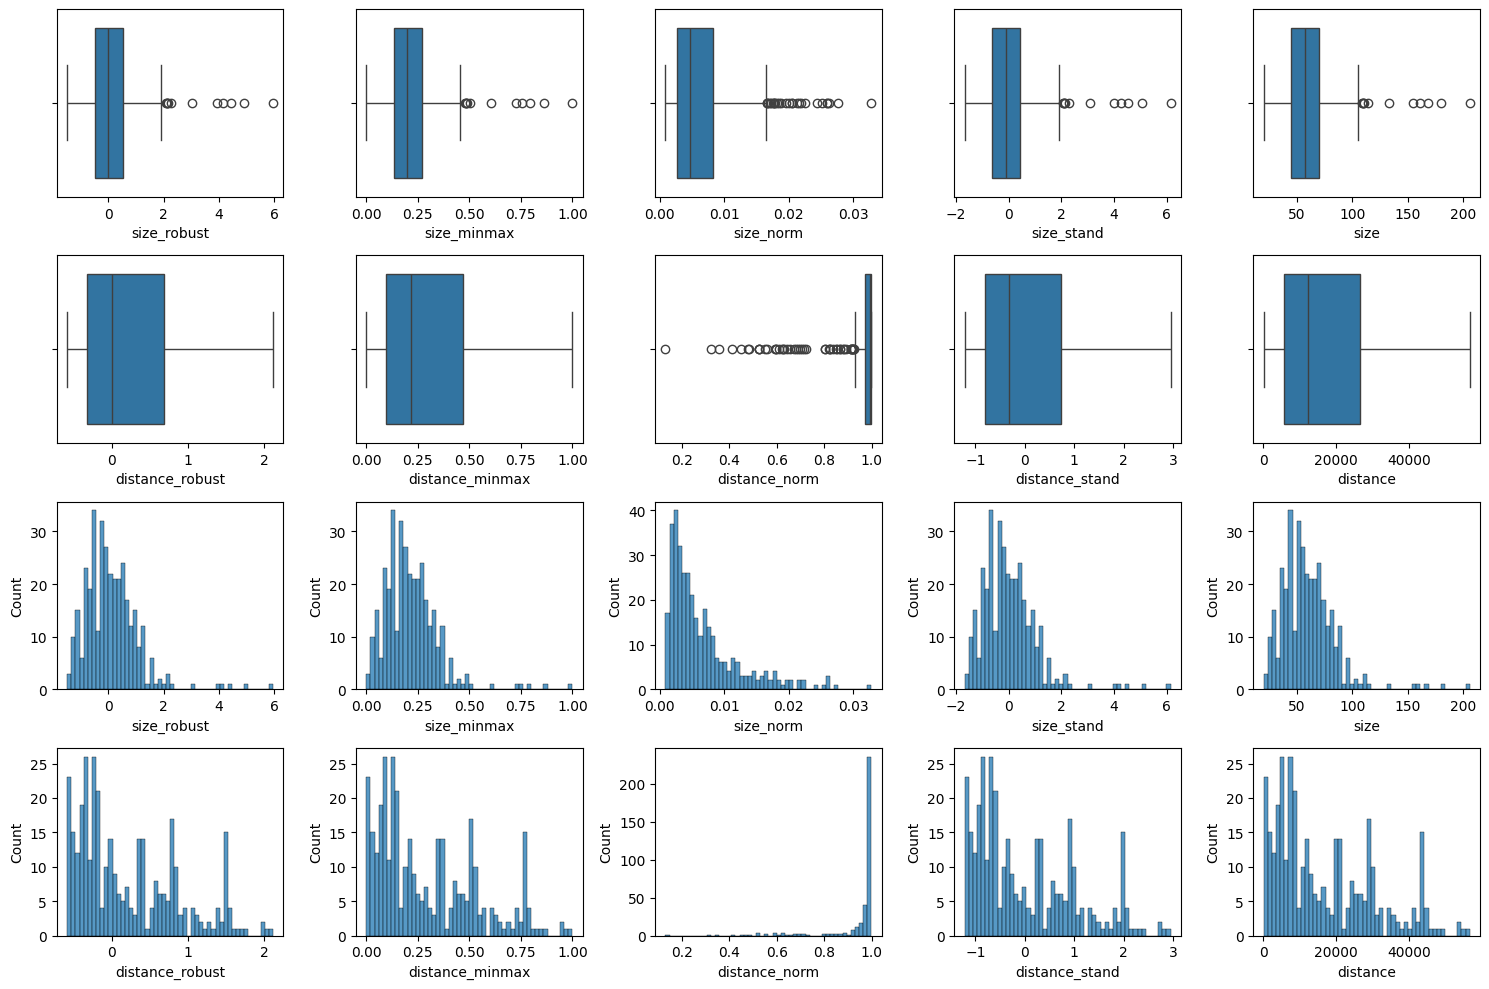

In [15]:
fig , axes = plt.subplots(nrows=4 , ncols=5, figsize = (15, 10))
sns.boxplot(x = "size_robust", data = df, ax = axes[0][0])
sns.boxplot(x = "size_minmax", data = df, ax = axes[0][1])
sns.boxplot(x = "size_norm", data = df, ax = axes[0][2])
sns.boxplot(x = "size_stand", data = df, ax = axes[0][3])
sns.boxplot(x = "size", data = df, ax = axes[0][4])

sns.boxplot(x = "distance_robust", data = df, ax = axes[1][0])
sns.boxplot(x = "distance_minmax", data = df, ax = axes[1][1])
sns.boxplot(x = "distance_norm", data = df, ax = axes[1][2])
sns.boxplot(x = "distance_stand", data = df, ax = axes[1][3])
sns.boxplot(x = "distance", data = df, ax = axes[1][4])

sns.histplot(x = "size_robust", data = df, ax = axes[2][0], bins = 50)
sns.histplot(x = "size_minmax", data = df, ax = axes[2][1], bins = 50)
sns.histplot(x = "size_norm", data = df, ax = axes[2][2], bins = 50)
sns.histplot(x = "size_stand", data = df, ax = axes[2][3], bins = 50)
sns.histplot(x = "size", data = df, ax = axes[2][4], bins = 50)


sns.histplot(x = "distance_robust", data = df, ax = axes[3][0], bins = 50)
sns.histplot(x = "distance_minmax", data = df, ax = axes[3][1], bins = 50)
sns.histplot(x = "distance_norm", data = df, ax = axes[3][2], bins = 50)
sns.histplot(x = "distance_stand", data = df, ax = axes[3][3], bins = 50)
sns.histplot(x = "distance", data = df, ax = axes[3][4], bins = 50)

plt.tight_layout()

## Observaciones

- Existen outliers en mi variable size, estos aparecen por encima de los 100 m2. Estos son pocos, pero debemos considerar qué tipo de pisos son 

In [16]:
df.shape

(353, 111)

In [17]:
df.head()

,price,size,municipality,distance,status,floor,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_False,exterior_True,rooms_0,rooms_1,rooms_2,rooms_3,rooms_4,bathrooms_1,bathrooms_2,bathrooms_3,size_robust,municipality_robust,distance_robust,status_robust,floor_robust,hasLift_robust,propertyType_chalet_robust,propertyType_countryHouse_robust,propertyType_duplex_robust,propertyType_flat_robust,propertyType_penthouse_robust,propertyType_studio_robust,exterior_False_robust,exterior_True_robust,rooms_0_robust,rooms_1_robust,rooms_2_robust,rooms_3_robust,rooms_4_robust,bathrooms_1_robust,bathrooms_2_robust,bathrooms_3_robust,size_minmax,municipality_minmax,distance_minmax,status_minmax,floor_minmax,hasLift_minmax,propertyType_chalet_minmax,propertyType_countryHouse_minmax,propertyType_duplex_minmax,propertyType_flat_minmax,propertyType_penthouse_minmax,propertyType_studio_minmax,exterior_False_minmax,exterior_True_minmax,rooms_0_minmax,rooms_1_minmax,rooms_2_minmax,rooms_3_minmax,rooms_4_minmax,bathrooms_1_minmax,bathrooms_2_minmax,bathrooms_3_minmax,size_norm,municipality_norm,distance_norm,status_norm,floor_norm,hasLift_norm,propertyType_chalet_norm,propertyType_countryHouse_norm,propertyType_duplex_norm,propertyType_flat_norm,propertyType_penthouse_norm,propertyType_studio_norm,exterior_False_norm,exterior_True_norm,rooms_0_norm,rooms_1_norm,rooms_2_norm,rooms_3_norm,rooms_4_norm,bathrooms_1_norm,bathrooms_2_norm,bathrooms_3_norm,size_stand,municipality_stand,distance_stand,status_stand,floor_stand,hasLift_stand,propertyType_chalet_stand,propertyType_countryHouse_stand,propertyType_duplex_stand,propertyType_flat_stand,propertyType_penthouse_stand,propertyType_studio_stand,exterior_False_stand,exterior_True_stand,rooms_0_stand,rooms_1_stand,rooms_2_stand,rooms_3_stand,rooms_4_stand,bathrooms_1_stand,bathrooms_2_stand,bathrooms_3_stand
0,750.0,60.0,705.594114,7037,695.243827,697.689843,702.252872,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.12,0.445948,-0.252799,0.000000,0.069359,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.215054,1.000000,0.121497,1.0,0.676194,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.008362,0.098337,0.980733,0.096895,0.097236,0.097872,0.0,0.0,0.0,0.000139,0.000000,0.000000,0.0,0.000139,0.000000,0.000139,0.000000,0.000000,0.0,0.000139,0.000000,0.0,0.011443,0.762605,-0.714088,0.289977,0.480841,0.950489,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,1.384686,-0.754247,-0.415641,-0.092582,0.347325,-0.342182,-0.0533
1,750.0,70.0,701.418584,16145,695.243827,678.664014,687.633544,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.52,0.038221,0.182949,0.000000,-0.756628,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.268817,0.917764,0.282949,1.0,0.204480,0.487892,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.004320,0.043286,0.996349,0.042905,0.041882,0.042436,0.0,0.0,0.0,0.000062,0.000000,0.000000,0.0,0.000062,0.000000,0.000000,0.000062,0.000000,0.0,0.000062,0.000000,0.0,0.432212,0.310888,-0.040932,0.289977,-0.966375,-0.760062,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,1.325825,-0.415641,-0.092582,0.347325,-0.342182,-0.0533
2,400.0,67.0,654.819074,55041,695.243827,696.092223,687.633544,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.40,-4.512073,2.043824,0.000000,0.000000,0.000000,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.252688,0.000000,0.972435,1.0,0.636583,0.487892,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.001217,0.011893,0.999691,0.012627,0.012643,0.012489,0.0,0.0,0.0,0.000000,0.000018,0.000000,0.0,0.000018,0.000000,0.000000,0.000018,0.000000,0.0,0.000000,0.000018,0.0,0.305981,-4.730340,2.833801,0.289977,0.359317,-0.760062,-

In [18]:
df_price = df[['price']]

In [19]:
df_price

,price
0,750.0
1,750.0
2,400.0
3,590.0
4,684.0
...,...
348,640.0
349,700.0
350,700.0
351,700.0


In [20]:
df_reverso = df.iloc[:, -22:]

In [21]:
df_reverso

,size_stand,municipality_stand,distance_stand,status_stand,floor_stand,hasLift_stand,propertyType_chalet_stand,propertyType_countryHouse_stand,propertyType_duplex_stand,propertyType_flat_stand,propertyType_penthouse_stand,propertyType_studio_stand,exterior_False_stand,exterior_True_stand,rooms_0_stand,rooms_1_stand,rooms_2_stand,rooms_3_stand,rooms_4_stand,bathrooms_1_stand,bathrooms_2_stand,bathrooms_3_stand
0,0.011443,0.762605,-0.714088,0.289977,0.480841,0.950489,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,1.384686,-0.754247,-0.415641,-0.092582,0.347325,-0.342182,-0.0533
1,0.432212,0.310888,-0.040932,0.289977,-0.966375,-0.760062,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,1.325825,-0.415641,-0.092582,0.347325,-0.342182,-0.0533
2,0.305981,-4.730340,2.833801,0.289977,0.359317,-0.760062,-0.092582,-0.0533,-0.203219,-1.909119,5.856620,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,1.325825,-0.415641,-0.092582,-2.879145,2.922420,-0.0533
3,0.432212,-2.056015,2.948728,0.289977,-1.593720,-0.760062,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,-0.754247,2.405922,-0.092582,-2.879145,2.922420,-0.0533
4,-0.619710,0.762605,-0.446614,-4.112120,-1.593720,-2.389728,-0.092582,-0.0533,-0.203219,-1.909119,-0.170747,2.520747,-0.488463,0.488463,2.490799,-0.722185,-0.754247,-0.415641,-0.092582,0.347325,-0.342182,-0.0533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,0.390135,-1.352245,0.932143,0.289977,0.359317,0.950489,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,1.325825,-0.415641,-0.092582,0.347325,-0.342182,-0.0533
349,-0.241018,-0.256093,-0.372706,0.289977,0.785731,0.950489,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,1.384686,-0.754247,-0.415641,-0.092582,0.347325,-0.342182,-0.0533
350,-0.030634,0.762605,-0.677725,0.289977,0.464947,0.950489,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,1.384686,-0.754247,-0.415641,-0.092582,0.347325,-0.342182,-0.0533
351,0.642596,0.116031,1.009599,0.289977,0.785731,-0.760062,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,1.325825,-0.415641,-0.092582,0.347325,-0.342182,-0.0533


In [22]:
df_combinado = pd.concat([df_price, df_reverso], axis=1)

In [23]:
df_combinado

,price,size_stand,municipality_stand,distance_stand,status_stand,floor_stand,hasLift_stand,propertyType_chalet_stand,propertyType_countryHouse_stand,propertyType_duplex_stand,propertyType_flat_stand,propertyType_penthouse_stand,propertyType_studio_stand,exterior_False_stand,exterior_True_stand,rooms_0_stand,rooms_1_stand,rooms_2_stand,rooms_3_stand,rooms_4_stand,bathrooms_1_stand,bathrooms_2_stand,bathrooms_3_stand
0,750.0,0.011443,0.762605,-0.714088,0.289977,0.480841,0.950489,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,1.384686,-0.754247,-0.415641,-0.092582,0.347325,-0.342182,-0.0533
1,750.0,0.432212,0.310888,-0.040932,0.289977,-0.966375,-0.760062,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,1.325825,-0.415641,-0.092582,0.347325,-0.342182,-0.0533
2,400.0,0.305981,-4.730340,2.833801,0.289977,0.359317,-0.760062,-0.092582,-0.0533,-0.203219,-1.909119,5.856620,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,1.325825,-0.415641,-0.092582,-2.879145,2.922420,-0.0533
3,590.0,0.432212,-2.056015,2.948728,0.289977,-1.593720,-0.760062,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,-0.754247,2.405922,-0.092582,-2.879145,2.922420,-0.0533
4,684.0,-0.619710,0.762605,-0.446614,-4.112120,-1.593720,-2.389728,-0.092582,-0.0533,-0.203219,-1.909119,-0.170747,2.520747,-0.488463,0.488463,2.490799,-0.722185,-0.754247,-0.415641,-0.092582,0.347325,-0.342182,-0.0533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,640.0,0.390135,-1.352245,0.932143,0.289977,0.359317,0.950489,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,1.325825,-0.415641,-0.092582,0.347325,-0.342182,-0.0533
349,700.0,-0.241018,-0.256093,-0.372706,0.289977,0.785731,0.950489,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,1.384686,-0.754247,-0.415641,-0.092582,0.347325,-0.342182,-0.0533
350,700.0,-0.030634,0.762605,-0.677725,0.289977,0.464947,0.950489,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,1.384686,-0.754247,-0.415641,-0.092582,0.347325,-0.342182,-0.0533
351,700.0,0.642596,0.116031,1.009599,0.289977,0.785731,-0.760062,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,1.325825,-0.415641,-0.092582,0.347325,-0.342182,-0.0533


In [24]:
df_combinado.columns

Index(['price', 'size_stand', 'municipality_stand', 'distance_stand',
       'status_stand', 'floor_stand', 'hasLift_stand',
       'propertyType_chalet_stand', 'propertyType_countryHouse_stand',
       'propertyType_duplex_stand', 'propertyType_flat_stand',
       'propertyType_penthouse_stand', 'propertyType_studio_stand',
       'exterior_False_stand', 'exterior_True_stand', 'rooms_0_stand',
       'rooms_1_stand', 'rooms_2_stand', 'rooms_3_stand', 'rooms_4_stand',
       'bathrooms_1_stand', 'bathrooms_2_stand', 'bathrooms_3_stand'],
      dtype='object')

In [25]:
df_combinado.head()

,price,size_stand,municipality_stand,distance_stand,status_stand,floor_stand,hasLift_stand,propertyType_chalet_stand,propertyType_countryHouse_stand,propertyType_duplex_stand,propertyType_flat_stand,propertyType_penthouse_stand,propertyType_studio_stand,exterior_False_stand,exterior_True_stand,rooms_0_stand,rooms_1_stand,rooms_2_stand,rooms_3_stand,rooms_4_stand,bathrooms_1_stand,bathrooms_2_stand,bathrooms_3_stand
0,750.0,0.011443,0.762605,-0.714088,0.289977,0.480841,0.950489,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,1.384686,-0.754247,-0.415641,-0.092582,0.347325,-0.342182,-0.0533
1,750.0,0.432212,0.310888,-0.040932,0.289977,-0.966375,-0.760062,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,1.325825,-0.415641,-0.092582,0.347325,-0.342182,-0.0533
2,400.0,0.305981,-4.730340,2.833801,0.289977,0.359317,-0.760062,-0.092582,-0.0533,-0.203219,-1.909119,5.856620,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,1.325825,-0.415641,-0.092582,-2.879145,2.922420,-0.0533
3,590.0,0.432212,-2.056015,2.948728,0.289977,-1.593720,-0.760062,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,-0.754247,2.405922,-0.092582,-2.879145,2.922420,-0.0533
4,684.0,-0.619710,0.762605,-0.446614,-4.112120,-1.593720,-2.389728,-0.092582,-0.0533,-0.203219,-1.909119,-0.170747,2.520747,-0.488463,0.488463,2.490799,-0.722185,-0.754247,-0.415641,-0.092582,0.347325,-0.342182,-0.0533


In [26]:
df_combinado.shape

(353, 23)

In [27]:
df_combinado.to_csv('../datos_3/df_combinado.csv')